<H1>Prediction Model English Premier League Season 2018-2019</H1>


<p>In this notebook you could find a prediction model implementation. The data used in this notebook was taken from <a>https://www.football-data.co.uk/books.php</a> by joseph buchdahl. The model was made based on the information in the book "Statistical Sports Models in Excel" by Andrew Mack available in Amazon.</p>

<p>In this notebook you will find:
<ul> Pandas inplementations: creating features, substracting columns, concatenate dataframes, filter dataframes, groupby.</ul>
<ul> Stastmodels: implement a linear regressions</ul>
<ul> Spicy: Minimazing </ul>

</p>

<H3>Welcome</H3>







To start, will be import the main libraries.




In [343]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from scipy.stats import norm

Import the repository with the .cvs files that have the seasons 2018 and 2019 of the English Premier League

In [344]:
!git clone https://github.com/Hardila-data/Premier_L.git

fatal: destination path 'Premier_L' already exists and is not an empty directory.


<H3>Load the season 2018 Premier League season in a pandas DataFrame </h3>
<H5> This dataset has well-detailed information related to any match of the season 2018-2019, for instance, HomeTeam, AwayTeam, goals scored by home and away team, betting odds, cards, referees, and so on.

In [345]:
address = 'Premier_L/Premier_League_2018.csv'
premier_2018_df = pd.read_csv(address)
premier_2018_df.head() 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


<H5>Let's make some plots!!!<H5>

Text(0.5, 1.0, 'Histogram Final results of the matches')

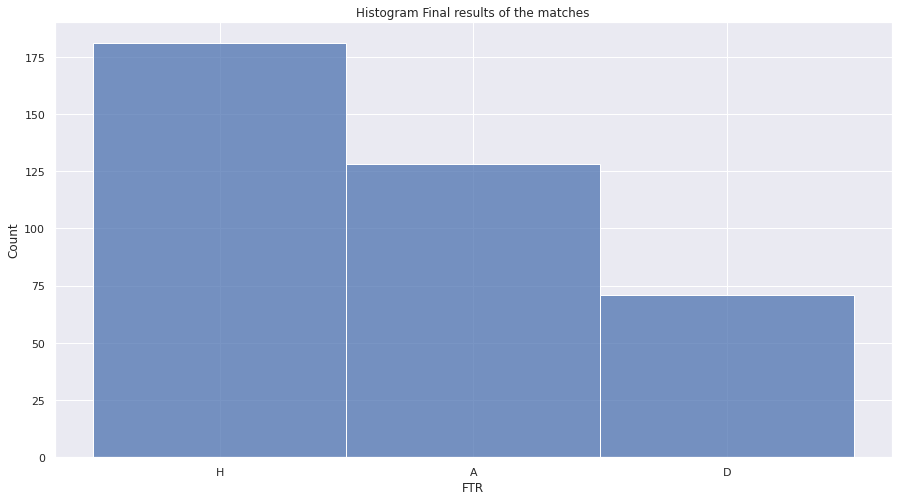

In [346]:
 FTR_plot = sns.histplot(x='FTR', data=premier_2018_df)
 FTR_plot.set_title('Histogram Final results of the matches')

Text(0.5, 1.0, 'Home Goals by team')

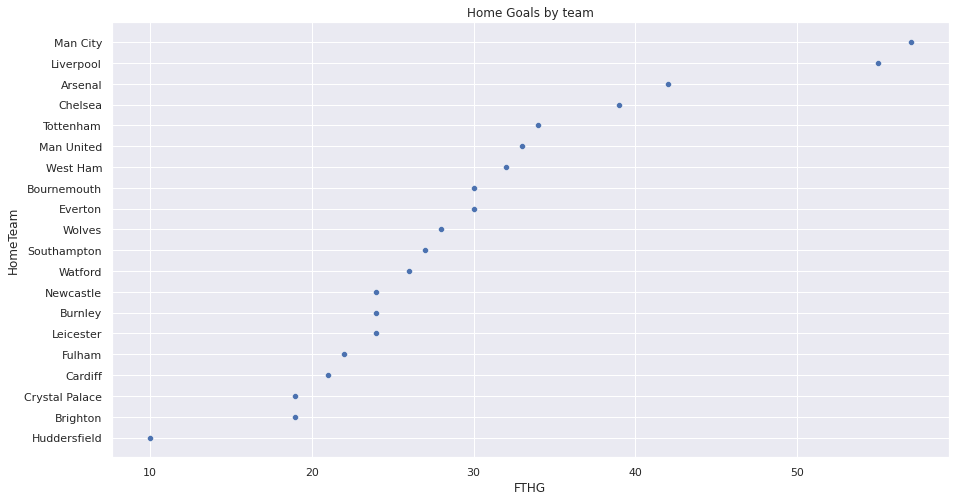

In [347]:
FTR_plot2 = sns.scatterplot(x='FTHG', y='HomeTeam' , legend=False ,data=(premier_2018_df.groupby(by='HomeTeam').sum().reset_index()).sort_values(by=['FTHG'], ascending =False))
sns.set(rc = {'figure.figsize':(15,8)})
FTR_plot2.set_title('Home Goals by team')

Text(0.5, 1.0, 'Away Goals by team')

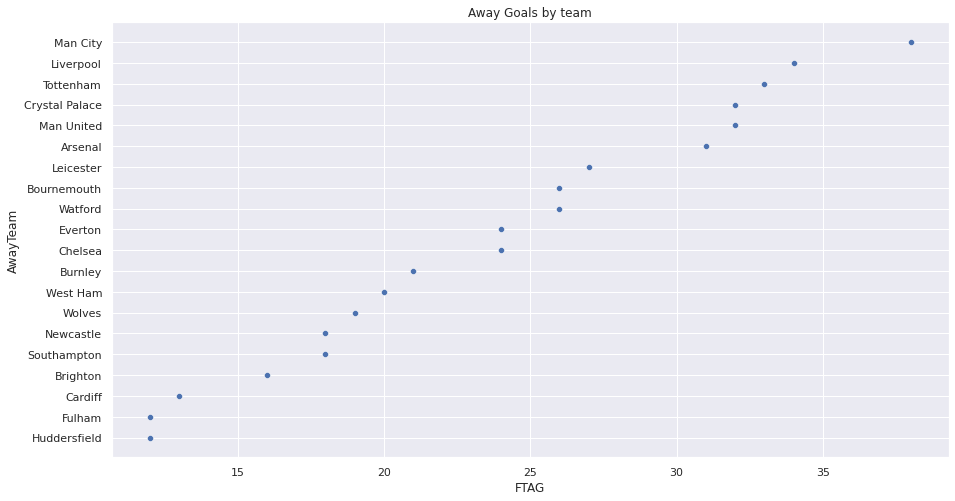

In [348]:
FTR_plot3 = sns.scatterplot(x='FTAG', y='AwayTeam' , legend=False ,data=(premier_2018_df.groupby(by='AwayTeam').sum().reset_index()).sort_values(by=['FTAG'], ascending =False))
sns.set(rc = {'figure.figsize':(15,8)})
FTR_plot3.set_title('Away Goals by team')

<p>Football games have three possible outcomes, Win, Draw(tie), loss. To deal with it, in the prediction of the final result, the matches with the outcome as draw have been transformed into two games, one indicating that home wins and other than away win. In the end, these new two matches will cancel each other. The creation of these two games will be helpful to determine the expected odds for the games.<p>

In [349]:
#Filter the draw games in the dataset 
premier_2018_df_draw = premier_2018_df.loc[premier_2018_df.FTR=='D']

#Create 2 copies one to indicate home win and another the away win 
premier_2018_df_draw_home_winner = premier_2018_df_draw.copy() 
premier_2018_df_draw_away_winner = premier_2018_df_draw.copy() 

premier_2018_df_draw_home_winner['FTR'] = 'H'
premier_2018_df_draw_home_winner['FTHG'] = 1
premier_2018_df_draw_home_winner['FTAG'] = 0

premier_2018_df_draw_away_winner['FTR'] = 'A'
premier_2018_df_draw_away_winner['FTHG'] = 0
premier_2018_df_draw_away_winner['FTAG'] = 1
premier_2018_df_draw_away_winner

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
6,E0,11/08/2018,Wolves,Everton,0,1,A,1,1,D,C Pawson,11,6,4,5,8,7,3,6,0,1,0,1,2.37,3.30,3.30,2.35,3.20,3.20,2.25,3.35,3.20,2.36,3.40,3.28,2.30,3.20,3.20,2.38,3.30,3.30,38,2.41,2.33,3.40,3.27,3.40,3.23,36,2.20,2.09,1.83,1.75,22,-0.25,2.04,1.98,1.92,1.88,2.44,3.23,3.32
9,E0,12/08/2018,Southampton,Burnley,0,1,A,0,0,D,G Scott,18,16,3,6,10,9,8,5,0,1,0,0,1.85,3.50,5.00,1.80,3.50,4.75,1.80,3.60,4.50,1.86,3.51,4.99,1.83,3.25,4.80,1.85,3.40,5.20,39,1.90,1.84,3.61,3.43,5.20,4.80,37,2.45,2.34,1.67,1.60,20,-0.75,2.19,2.11,1.82,1.76,2.03,3.19,4.65
10,E0,18/08/2018,Cardiff,Newcastle,0,1,A,0,0,D,C Pawson,12,12,1,6,14,16,5,5,2,2,0,1,3.25,3.10,2.54,3.10,3.10,2.45,2.90,3.20,2.50,3.25,3.12,2.54,3.10,3.00,2.45,3.25,3.10,2.55,41,3.25,3.14,3.21,3.07,2.60,2.50,38,2.61,2.48,1.58,1.53,21,0.25,1.82,1.78,2.15,2.11,3.27,3.21,2.47
21,E0,25/08/2018,Bournemouth,Everton,0,1,A,0,0,D,L Probert,17,11,5,3,12,10,6,2,0,3,1,1,2.62,3.60,2.75,2.60,3.40,2.70,2.55,3.50,2.65,2.63,3.58,2.77,2.50,3.60,2.62,2.60,3.60,2.75,41,2.69,2.59,3.60,3.49,2.81,2.70,38,1.76,1.72,2.25,2.12,21,-0.25,2.29,2.22,1.74,1.69,2.68,3.51,2.75
22,E0,25/08/2018,Huddersfield,Cardiff,0,1,A,0,0,D,M Oliver,5,14,1,4,8,10,7,7,0,1,1,0,2.37,3.00,3.70,2.25,3.10,3.50,2.30,3.00,3.55,2.34,3.10,3.68,2.30,3.10,3.30,2.38,3.10,3.60,41,2.40,2.32,3.18,3.04,3.70,3.53,38,2.72,2.58,1.55,1.50,22,-0.25,2.01,1.95,1.95,1.91,2.46,3.03,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,E0,05/05/2019,Arsenal,Brighton,0,1,A,1,0,H,A Taylor,20,11,8,5,9,14,16,3,5,2,0,0,1.40,5.00,9.00,1.36,4.75,9.25,1.43,4.50,7.70,1.43,4.72,8.49,1.40,4.60,8.50,1.40,4.80,8.50,34,1.44,1.41,5.00,4.69,9.25,8.30,33,1.73,1.67,2.27,2.20,22,-1.50,2.35,2.21,1.75,1.70,1.27,6.31,12.29
368,E0,05/05/2019,Huddersfield,Man United,0,1,A,0,1,A,L Mason,7,23,3,7,10,10,3,7,1,1,0,0,11.00,6.00,1.30,8.75,5.50,1.33,9.50,5.60,1.30,9.23,5.56,1.34,11.00,5.25,1.30,12.00,5.25,1.33,34,12.00,9.95,6.00,5.37,1.35,1.33,32,1.71,1.67,2.30,2.22,22,1.50,2.00,1.93,1.98,1.93,9.96,5.76,1.33
374,E0,12/05/2019,Leicester,Chelsea,0,1,A,0,0,D,A Taylor,9,14,3,4,9,8,4,5,0,1,0,0,2.40,3.75,2.90,2.35,3.60,2.85,2.35,3.50,2.90,2.44,3.65,2.93,2.38,3.60,2.88,2.40,3.70,2.90,35,2.45,2.40,3.75,3.57,3.05,2.89,34,1.75,1.70,2.26,2.16,19,-0.50,2.45,2.38,1.65,1.62,2.42,3.63,2.98
377,E0,12/05/2019,Southampton,Huddersfield,0,1,A,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,1.44,4.75,8.50,1.42,4.75,7.25,1.42,4.80,7.10,1.44,4.83,7.62,1.40,4.75,8.00,1.40,4.80,8.50,34,1.45,1.42,5.15,4.81,8.75,7.64,32,1.67,1.62,2.40,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49


<p>Now, in the main dataset, the draws will be removed and will concatenate the new datasets 'premier_2018_df_draw_home_winner' and 'premier_2018_df_draw_away_winner'. These new datasets will be deleted as soon as the concatenation occurs.</p>

In [350]:
premier_2018_df = premier_2018_df[premier_2018_df.FTR!='D']
##Concatenation
premier_2018_df = premier_2018_df.append(premier_2018_df_draw_home_winner)
premier_2018_df = premier_2018_df.append(premier_2018_df_draw_away_winner)
print(f'Shape of the dataset with the contatenation : {premier_2018_df.shape}')
#deleted premier_2018_df_draw_home_winner and premier_2018_df_draw_home_winner
del premier_2018_df_draw_home_winner
del premier_2018_df_draw_away_winner
premier_2018_df.head()

Shape of the dataset with the contatenation : (451, 62)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


<H5>Let's choose the columns that now are important to generata de model and the predictions. Date,  HomeTeam,  AwayTeam, FTHG, FTAG, FTR </H5>

In [351]:
columns_matters = ['Date', 'HomeTeam','AwayTeam','FTHG','FTAG','FTR']

Create a new DataFrame with the columns

In [352]:
premier_2018_df_new = premier_2018_df[columns_matters]
premier_2018_df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,10/08/2018,Man United,Leicester,2,1,H
1,11/08/2018,Bournemouth,Cardiff,2,0,H
2,11/08/2018,Fulham,Crystal Palace,0,2,A
3,11/08/2018,Huddersfield,Chelsea,0,3,A
4,11/08/2018,Newcastle,Tottenham,1,2,A


There will be a new feature that represent the Total Goals in any match 'game_total'

In [353]:
premier_2018_df_new['game_total'] = premier_2018_df_new['FTHG'] + premier_2018_df_new['FTAG']
premier_2018_df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_total
0,10/08/2018,Man United,Leicester,2,1,H,3
1,11/08/2018,Bournemouth,Cardiff,2,0,H,2
2,11/08/2018,Fulham,Crystal Palace,0,2,A,2
3,11/08/2018,Huddersfield,Chelsea,0,3,A,3
4,11/08/2018,Newcastle,Tottenham,1,2,A,3


A new feature will be created, the Margin of Victory 'Home_MOV', it is the subtraction of Home goals vs away goals in any match. This feature will be used to determine how many goals one team can score or receive(Handicap).

In [354]:
premier_2018_df_new['Home_Mov'] = premier_2018_df_new['FTHG'] - premier_2018_df_new['FTAG']
premier_2018_df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_total,Home_Mov
0,10/08/2018,Man United,Leicester,2,1,H,3,1
1,11/08/2018,Bournemouth,Cardiff,2,0,H,2,2
2,11/08/2018,Fulham,Crystal Palace,0,2,A,2,-2
3,11/08/2018,Huddersfield,Chelsea,0,3,A,3,-3
4,11/08/2018,Newcastle,Tottenham,1,2,A,3,-1


A new feature related to the final result of the game will be added  'game_result'

In [355]:
premier_2018_df_new['game_result'] = np.where(premier_2018_df_new['FTHG'] > premier_2018_df_new['FTAG'],1,0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<p>It is time to create a new DataFrame that contains some values which represent the strength of the teams, it is similar to the standing table of the season. In this moment of the notebook, it has random values to any team. The values in the Logistic_strength feature of this DataFrame will be modified by the values obtained in an optimization.</p>

In [356]:
rank_df = pd.DataFrame(premier_2018_df_new.HomeTeam.unique())
rank_df.columns=['team']
rank_df['Logistic_strenght']=1
rank_df

,team,Logistic_strenght
0,Man United,1
1,Bournemouth,1
2,Fulham,1
3,Huddersfield,1
4,Newcastle,1
5,Watford,1
6,Arsenal,1
7,Liverpool,1
8,Chelsea,1
9,Everton,1


Now it is time to add a new feature ('logistic function'). The equation of the logistic function will determine how likely one team will be the winner. 

Logistic Function = 1/(1+e-(Home_Advantage + Home_logistic_strength - Away_ Logistic_strength))


This logistic function will take the informatión from Rank DataFrame.

The logistic function generates outcomes between cero and one. Close to one will be the winner, close to cero will be the loser. 

In [357]:
def logistic_function_feature():
  #Going to iterate over the rows in the premier league DataFrame
  for ind,row in premier_2018_df_new.iterrows():
    #Take the strenght value of home and away team from Rank DataFrame
    HT =rank_df.loc[rank_df.team==row[1], 'Logistic_strenght']
    AT =rank_df.loc[rank_df.team==row[2], 'Logistic_strenght']
    #Evaluate the logistic function with the home and away values strength
    logistic_ecuation = 1/(1+np.exp(-((0.02+HT.to_numpy()-AT.to_numpy())[0])))
    #Add the logistics value calculated to a new column
    premier_2018_df_new.loc[ind,('logistic_function')] = logistic_ecuation

logistic_function_feature()
premier_2018_df_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_total,Home_Mov,game_result,logistic_function
0,10/08/2018,Man United,Leicester,2,1,H,3,1,1,0.505
1,11/08/2018,Bournemouth,Cardiff,2,0,H,2,2,1,0.505
2,11/08/2018,Fulham,Crystal Palace,0,2,A,2,-2,0,0.505
3,11/08/2018,Huddersfield,Chelsea,0,3,A,3,-3,0,0.505
4,11/08/2018,Newcastle,Tottenham,1,2,A,3,-1,0,0.505


<p>There is another feature that will be created ('result function'). This feature will create a relation between the actual result of the match(one win, cero loss) and the logistic function feature.</p>

In [358]:
def result_function_feature(df):
  #Add a new index to the DataFrame to create a secuentail order and add the values in the new feature 'resul_function' without problems
  df = df.reset_index()

  #If the game result is cero, result_function will take the same value from the logistic_function
  df_error_1 = df.loc[df.game_result==0]
  error_1 = df_error_1.logistic_function

  #If the game result is one, result_function will be the substraction of 1- logistic_function 
  df_error = df.loc[df.game_result==1]
  error = 1 - df_error.logistic_function

  #concatenated error_1 and error to create the new feature 
  df['result_function']  = error_1.append(error)
  return df.drop(columns='index')
premier_2018_df_new = result_function_feature(premier_2018_df_new)
premier_2018_df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_total,Home_Mov,game_result,logistic_function,result_function
0,10/08/2018,Man United,Leicester,2,1,H,3,1,1,0.505,0.495
1,11/08/2018,Bournemouth,Cardiff,2,0,H,2,2,1,0.505,0.495
2,11/08/2018,Fulham,Crystal Palace,0,2,A,2,-2,0,0.505,0.505
3,11/08/2018,Huddersfield,Chelsea,0,3,A,3,-3,0,0.505,0.505
4,11/08/2018,Newcastle,Tottenham,1,2,A,3,-1,0,0.505,0.505


<H3>Time to make some plots!!!! </H3>

Text(0.5, 1.0, 'Game Results')

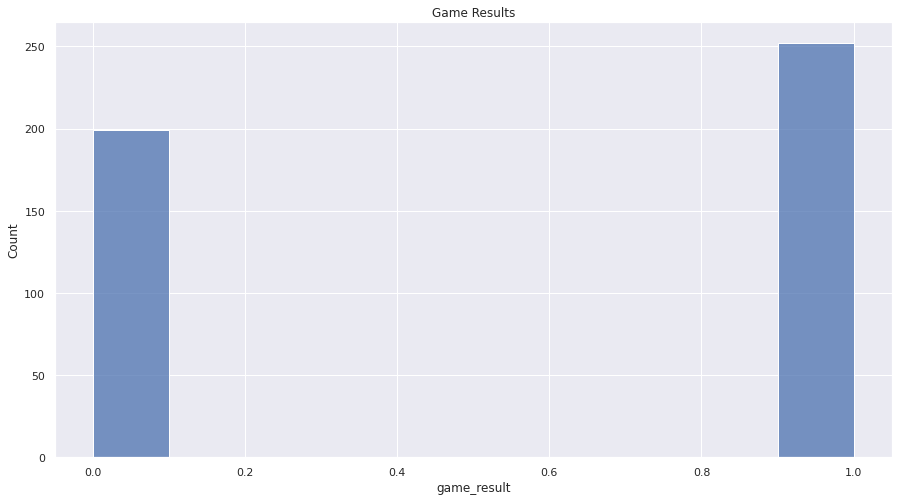

In [359]:
game_result_plot = sns.histplot(x='game_result', data=premier_2018_df_new)
game_result_plot.set_title('Game Results')

Text(0.5, 1.0, 'Margen of Victories')

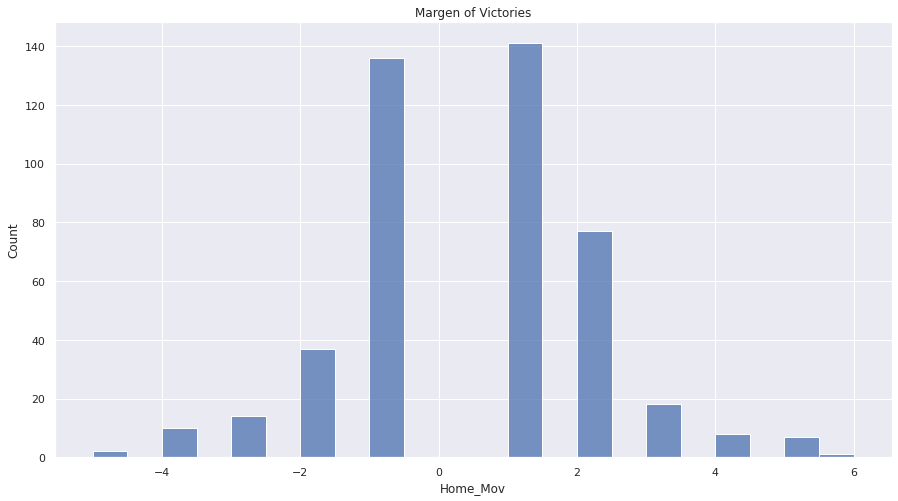

In [360]:
MOV_plot = sns.histplot(x='Home_Mov', data=premier_2018_df_new)
MOV_plot.set_title('Margen of Victories')

Now it will be calculated the addition of all the values in the result function. These results will improve in order of the outcomes obtained from the optimization process.  

In [361]:
def result_function_sum():
  prob_sum = premier_2018_df_new.result_function.sum()
  log_sum = np.log(prob_sum)
  print(f'This is the result of multiply all the probabilities obtain in the result function {prob_sum}, and the logarithm of that result {log_sum}')

result_function_sum()

This is the result of multiply all the probabilities obtain in the result function 225.23500883298004, and the logarithm of that result 5.417144340812979


The next step is to optimize the quantity obtain in the multiplication of the resul_function column, which could be obtained using the optimizing functions from the spicy library.

The optimization process will take the default logistic strength values from rank_df and looking for the best logistic strength values.

If the value in the logistic function improves, the value in the result_function improves too.


In [362]:
def teams_error(val, team, df):

    team_values = dict()
    for i in range((len(val)-1)):
        team_values[team[i]] = val[i]
    df = df.replace(team_values)
    #take home advantage from values imported
    home_adv = val[20]
    #Filter in the dataset the games with game_result=0
    df_error_1 = df.loc[df.game_result==0]

    #square results in (logistic function)
    error_1 = (1/(1+np.exp(-(home_adv + df_error_1['HomeTeam']- df_error_1['AwayTeam']))))**2
    
    df_error = df.loc[df.game_result==1]
    #square results in (1- logistic function)
    error = (1-(1/(1+np.exp(-(home_adv +df_error['HomeTeam']- df_error['AwayTeam'])))))**2
    
    total = error_1.append(error).sum()
    return total
    # return np.log(np.prod(error))

Name of the teams and default values to optimize.

In [363]:
#Teams from rank_df
teams = rank_df.team.unique()

#Default logistic_strength rankd_df
default_values = rank_df.Logistic_strenght
default_values = np.append(default_values, 0.1)

Dummy attempt to teams_error function. The optimization helps to reduce the error obtained in the function teams_error.

<p>Error function</p>
<p>error = (game_results - logistic_function)**2</p>

In [364]:
teams_error(default_values, teams, premier_2018_df_new)

111.7075089366219

<H5>It's time to execute the optimization.</H5>
<p>The result will be similar to te Standing Table of the season.</p>
As a recomendation the home_adventage parameter will be lower than the logistic strength default parameters.

In [365]:
res = optimize.minimize(teams_error, args=(teams, premier_2018_df_new), x0=default_values, method = 'Nelder-Mead', options={'maxiter':400})
home_adventage = res.x[20]
print(f'Home Adventage = {home_adventage}')
rank_df.Logistic_strenght = res.x[:20]
rank_df.sort_values(by='Logistic_strenght', ascending=False)

Home Adventage = 0.15182148525062267


,team,Logistic_strenght
15,Man City,2.567489
7,Liverpool,2.340823
0,Man United,1.699240
6,Arsenal,1.697105
8,Chelsea,1.693981
11,Tottenham,1.668362
19,Wolves,1.384559
10,Leicester,1.175713
9,Everton,1.145368
12,West Ham,1.096435


Update the result_function column with the new optimizing values.

In [366]:
logistic_function_feature()
premier_2018_df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_total,Home_Mov,game_result,logistic_function,result_function
0,10/08/2018,Man United,Leicester,2,1,H,3,1,1,0.632633,0.495
1,11/08/2018,Bournemouth,Cardiff,2,0,H,2,2,1,0.658866,0.495
2,11/08/2018,Fulham,Crystal Palace,0,2,A,2,-2,0,0.290524,0.505
3,11/08/2018,Huddersfield,Chelsea,0,3,A,3,-3,0,0.136869,0.505
4,11/08/2018,Newcastle,Tottenham,1,2,A,3,-1,0,0.322900,0.505


Update the result_function column with the new optimizing values.

In [367]:
premier_2018_df_new = result_function_feature(premier_2018_df_new)
premier_2018_df_new.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,game_total,Home_Mov,game_result,logistic_function,result_function
0,10/08/2018,Man United,Leicester,2,1,H,3,1,1,0.632633,0.367367
1,11/08/2018,Bournemouth,Cardiff,2,0,H,2,2,1,0.658866,0.341134
2,11/08/2018,Fulham,Crystal Palace,0,2,A,2,-2,0,0.290524,0.290524
3,11/08/2018,Huddersfield,Chelsea,0,3,A,3,-3,0,0.136869,0.136869
4,11/08/2018,Newcastle,Tottenham,1,2,A,3,-1,0,0.322900,0.322900


The addition of the result_function values will be calculated again to see the improvement by the optimization.


In [368]:
result_function_sum()

This is the result of multiply all the probabilities obtain in the result function 185.96364731817576, and the logarithm of that result 5.225551210085494


<p>Let's make some plots!!!</p>
This plot shows a regression line that best fit the Logistic_function feature and Home_Mov

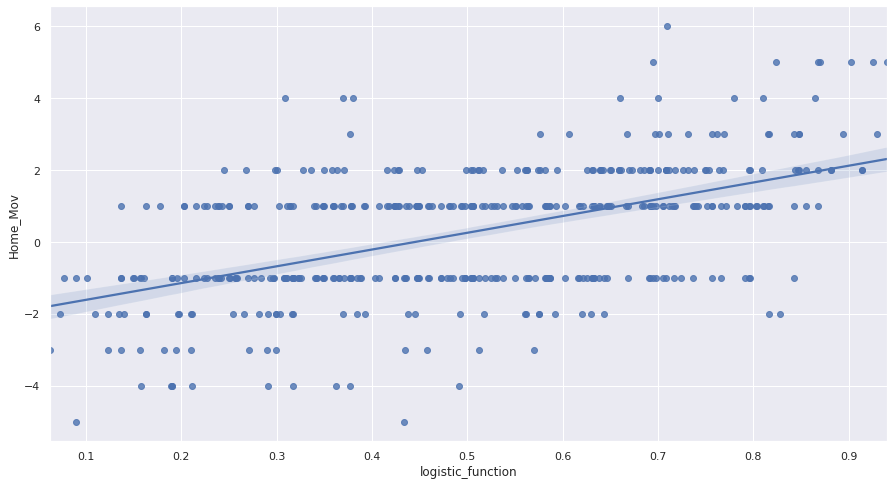

In [369]:
import statsmodels.api as sm

sns.regplot(x='logistic_function', y='Home_Mov', data=premier_2018_df_new)

<p>To predict the outcomes, the rank_df DataFrame will give us the values to calculate the logistic function. Taking the logistic_function value calculated, we could obtain the Home_Mov(Handicap).<p>
<p>To calculate the Home_Mov based on logistic_function should be fitted a linear regression model.<p>
<p>The linear regression model will take like ('X') the values in the feature 'Logistic_function' and will take like('y') the values in the Home_Mov.<p>

In [370]:
import statsmodels.api as sm

X = premier_2018_df_new[['logistic_function']]
y = premier_2018_df_new[['Home_Mov']]

#To create a constant in the model
X = sm.add_constant(X)
#Fit the regression model
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Home_Mov   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     168.9
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           5.36e-33
Time:                        19:01:42   Log-Likelihood:                -844.60
No. Observations:                 451   AIC:                             1693.
Df Residuals:                     449   BIC:                             1701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.0802      0.195    -10.654      0.000      -2.464      -1.696
logistic_function     4.6632      0.359     12.995      0.000       3.958       5.368
==============================================================================
Omnibus:                        0.435   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.422
Skew:                          -0.074   Prob(JB):                        0.810
Kurtosis:                       2.982   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>The R-squared will be better if it is close to one. In our case R-squared:0.272 </p>

In [371]:
result.predict()

array([ 8.69908660e-01,  9.92242831e-01, -7.25418797e-01, -1.44194848e+00,
       -5.74443128e-01,  5.44519286e-01, -6.84250067e-01,  1.55609215e+00,
        2.71087091e-01,  8.01676884e-01,  3.19079129e-02,  1.85627563e+00,
        5.40771017e-01, -9.13793478e-01, -2.50280091e-01,  2.30415407e+00,
       -1.16443880e+00,  9.52626726e-01,  1.90982476e+00, -2.88208536e-01,
       -1.38913111e-01, -6.00444136e-01,  1.60907693e-01,  3.10715226e-01,
        1.18380179e+00,  5.38421821e-01, -9.54573187e-01,  1.85020780e+00,
       -5.93074355e-02, -1.09892263e+00, -1.19303421e+00, -6.68462553e-01,
       -8.29139640e-02,  1.72205006e+00, -8.79687283e-01,  2.25717380e+00,
       -6.03598180e-01, -4.83346671e-01, -6.98671488e-01,  3.31744547e-01,
        1.37210620e+00, -8.86577563e-01, -3.08723390e-01, -1.66247178e+00,
        1.63308762e+00,  1.84830510e+00,  9.00365439e-01,  1.23802589e+00,
        1.47553595e+00, -1.42770307e+00,  2.03017098e+00, -3.60355244e-02,
       -4.09424120e-01,  

The standard error coeficient of the model will be calculated to determien the odds.

In [372]:
Standard_error_coeficient = np.sqrt(np.sum(((result.predict() - premier_2018_df_new['Home_Mov'])**2))/result.nobs)
Standard_error_coeficient

1.5742650640386158

<H4>Now its time to determine the odds in any game</H4>
<p>Let's look at Arsenal games<p>
To test the outcomes in different games. Only have to change the names in the logistic function below, first the home team, and second the away team.

In [373]:
#TEAM A LOGISTIC FUNCTION
team_a_logistic = (1/(1+np.exp(-(home_adventage+rank_df.loc[rank_df.team=='Arsenal','Logistic_strenght'].to_numpy()[0]- rank_df.loc[rank_df.team=='Watford','Logistic_strenght'].to_numpy()[0]))))

# TEAM B LOGISTIC FUNCTION
team_b_logistic = 1-team_a_logistic
print(f' Logistic function Home Team : {team_a_logistic}\n Logistic function Away Team : {team_b_logistic}')

 Logistic function Home Team : 0.7378567386872524
 Logistic function Away Team : 0.26214326131274757


Evaluate the Logistic Function Home Team in the linear regression model to obtain the margin of victories.

In [374]:
##MOV Prediction
spread_home = result.predict([[1,team_a_logistic]])
spread_away = -1*spread_home
spread_home,spread_away
print(f'Margin of Victories Home : {spread_home[0]}, Away : {spread_away[0]}')

Margin of Victories Home : 1.360591735083664, Away : -1.360591735083664


Win probabilies

In [375]:
##Win_Prob
win_prob_home = norm.sf(0.5,spread_home,Standard_error_coeficient)
win_prob_away = norm.sf(0.5,spread_away,Standard_error_coeficient)
win_prob_draw= 1 - (win_prob_home + win_prob_away)
print(f' Probability Home Win : {win_prob_home} \n Probability Draw Win : {win_prob_draw} \n Probability Away Win : {win_prob_away}')

 Probability Home Win : [0.7076947] 
 Probability Draw Win : [0.17367856] 
 Probability Away Win : [0.11862674]


<H5>Finally the odds¡¡¡</H5>

In [376]:
#Odds
print(f' Home odds : {1/win_prob_home} \n Draw odds : {1/win_prob_draw} \n Away odds : {1/win_prob_away}')

 Home odds : [1.4130387] 
 Draw odds : [5.75776323] 
 Away odds : [8.42980242]


Filter the dataset by Arsenal games playing in home field to compare the odds.

In [377]:
premier_2018_df.loc[premier_2018_df.HomeTeam=='Arsenal']

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
7,E0,12/08/2018,Arsenal,Man City,0,2,A,0,1,A,M Oliver,9,17,3,8,11,14,2,9,2,2,0,0,4.00,3.80,1.95,3.70,3.75,1.95,3.60,3.60,2.00,4.00,3.97,1.93,3.80,3.80,1.91,3.90,4.0,1.91,39,4.15,3.83,4.00,3.80,2.00,1.92,36,1.60,1.55,2.55,2.42,20,0.75,1.78,1.74,2.21,2.15,4.43,4.13,1.81
20,E0,25/08/2018,Arsenal,West Ham,3,1,H,1,1,D,G Scott,17,13,10,5,16,13,10,2,1,3,0,0,1.36,5.50,9.00,1.36,5.25,7.75,1.40,4.80,7.50,1.38,5.52,8.77,1.36,5.00,7.50,1.36,5.5,9.00,41,1.40,1.37,5.72,5.32,9.50,8.10,33,1.50,1.44,2.90,2.73,21,-1.50,2.05,2.00,1.92,1.87,1.37,5.65,8.67
58,E0,23/09/2018,Arsenal,Everton,2,0,H,0,0,D,J Moss,9,9,5,6,17,12,5,9,2,1,0,0,1.44,5.00,7.50,1.48,4.60,6.50,1.45,4.50,7.00,1.49,4.93,6.88,1.47,4.75,6.00,1.45,5.0,7.00,39,1.49,1.46,5.05,4.83,7.50,6.54,31,1.49,1.44,2.88,2.75,22,-1.00,1.74,1.70,2.29,2.20,1.40,5.46,7.94
60,E0,29/09/2018,Arsenal,Watford,2,0,H,0,0,D,A Taylor,9,13,2,4,11,17,6,6,2,2,0,0,1.44,5.10,7.00,1.45,4.75,6.50,1.45,4.50,7.00,1.50,4.85,6.75,1.44,5.00,6.00,1.50,4.8,6.50,40,1.51,1.47,5.10,4.77,7.50,6.41,32,1.50,1.44,2.90,2.73,24,-1.00,1.81,1.75,2.23,2.13,1.49,4.88,6.75
89,E0,22/10/2018,Arsenal,Leicester,3,1,H,1,1,D,C Kavanagh,19,8,6,2,10,10,6,4,2,2,0,0,1.53,4.50,6.50,1.50,4.33,6.50,1.53,4.50,5.60,1.56,4.36,6.51,1.53,4.33,5.80,1.53,4.6,6.25,38,1.58,1.53,4.75,4.45,6.75,5.99,29,1.50,1.47,2.75,2.62,22,-1.00,1.90,1.85,2.08,2.01,1.63,4.13,6.03
137,E0,02/12/2018,Arsenal,Tottenham,4,2,H,1,2,A,M Dean,22,11,7,6,15,17,8,5,3,3,0,1,2.62,3.60,2.75,2.50,3.60,2.70,2.65,3.40,2.65,2.63,3.73,2.70,2.55,3.50,2.62,2.55,3.6,2.75,38,2.65,2.56,3.75,3.57,2.75,2.69,33,1.61,1.56,2.57,2.41,21,-0.25,2.28,2.21,1.76,1.71,2.94,3.53,2.53
150,E0,08/12/2018,Arsenal,Huddersfield,1,0,H,0,0,D,P Tierney,14,6,2,0,13,20,7,1,5,4,0,0,1.28,6.00,12.00,1.28,5.75,10.50,1.27,6.00,10.00,1.27,6.13,11.66,1.25,6.00,12.00,1.29,6.0,13.00,38,1.30,1.28,6.25,5.88,13.00,11.20,32,1.60,1.55,2.64,2.44,23,-1.50,1.85,1.80,2.12,2.06,1.30,5.74,12.40
171,E0,22/12/2018,Arsenal,Burnley,3,1,H,1,0,H,K Friend,10,7,6,2,10,14,1,3,2,5,0,0,1.25,6.50,15.00,1.22,6.25,13.50,1.25,6.10,11.00,1.23,6.40,14.96,1.22,6.00,15.00,1.25,6.5,15.00,36,1.26,1.24,6.75,6.29,15.25,13.63,35,1.50,1.46,2.80,2.67,23,-1.50,1.72,1.68,2.31,2.24,1.20,7.15,15.42
200,E0,01/01/2019,Arsenal,Fulham,4,1,H,1,0,H,G Scott,16,9,9,4,7,12,8,3,0,1,0,0,1.33,5.75,9.50,1.33,5.50,8.75,1.35,5.30,8.00,1.34,5.58,9.02,1.32,5.25,9.50,1.36,5.5,10.00,36,1.38,1.34,6.00,5.44,10.00,8.84,34,1.48,1.44,2.90,2.72,23,-1.50,2.00,1.95,1.95,1.91,1.39,5.24,8.13
220,E0,19/01/2019,Arsenal,Chelsea,2,0,H,2,0,H,A Taylor,13,13,5,1,13,15,5,6,0,2,0,0,3.10,3.60,2.37,3.00,3.50,2.30,2.95,3.60,2.30,3.09,3.65,2.37,3.00,3.50,2.30,3.10,3.6,2.38,36,3.11,3.01,3.66,3.54,2.40,2.34,35,1.71,1.67,2.31,2.21,20,0.25,1.89,1.86,2.09,2.02,3.36,3.49,2.30


<H2>I hope you found this notebook joyful!!!</H2>